In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from time import time

In [2]:
n_walkers = 10
n_hopsperwalker = 30_000

n_samples = n_walkers * n_hopsperwalker
burn_in = int(40)
n_used = n_samples-burn_in*n_walkers

hop_size = 5                                    # set it in order to get alpha of about 0.5

#random.seed(10)

In [3]:
run -i Skeleton-Copy1.py 

In [4]:
#list_alpha = [0.40, 0.45, 0.50, 0.55, 0.60]
list_alpha = [0.45]
tic = time()
for i in list_alpha:
    pdfparameters = [i]
    functionparameters = [i]
    dist_x, dist_y, dist_z, accept_ratio, r_rp, rp_r = mcmc_sample_3D(hops=n_samples, pdf = psi_Hydrogen, pdfparam=pdfparameters)
    #integral, variance= integrate(pdff=psi2_Harmonic, func=E_L_Harmonic, param=pdfparameters, funcparam=functionparameters, dist_=dist)
    #strin = "alpha: " + str(i) + "; integral: " + str((integral)) + " $\pm$ " + str(variance) + "; accepted/total = " + str(accept_ratio)
    #print(strin)
toc = time()
print("Simulation time in seconds", toc-tic)
print("Acc ratio:", accept_ratio)

Simulation time in seconds 3.9528050422668457
Acc ratio: 0.49162333333333336


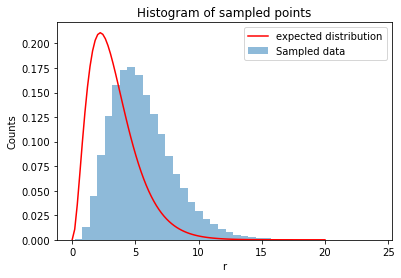

5.534115975937453
6.521703418100389


In [5]:
#plot_dist(dist_x, 40, psi_Hydrogen, pdfparameters[0])
#plot_dist(dist_y, 40, psi_Hydrogen, pdfparameters[0])
#plot_dist(dist_z, 40, psi_Hydrogen, pdfparameters[0])
dist_x = np.array(dist_x)
dist_y = np.array(dist_y)
dist_z = np.array(dist_z)
#print("L_x = ", len(dist_x))
#print("L_y = ", len(dist_y))
#print("L_z = ", len(dist_z))
dist_r = np.sqrt(dist_x**2 + dist_y**2 + dist_z**2)
plot_dist(dist_x, dist_y, dist_z,dist_r, 40, psi_Hydrogen, pdfparameters[0])
print(np.average(dist_r))
print(np.sqrt(np.pi/(2*0.45))**3)
#print(max(r_rp - rp_r))
#step = np.arange(1,len(dist_x)+1)
#plt.plot(step, dist_x)
#plt.ylabel("x")
#plt.xlabel("hop number")
#plt.title("path of walkers")
#plt.show()

In [6]:
plot_dist(trimmed_dist, 40, psi2_Harmonic, pdfparameters[0])

NameError: name 'trimmed_dist' is not defined